# Simple Image Trade : Buyer Side

The code below buys an image from a predefined address on the Dopamine network, and pays 100 DOPA wei for it.

To run this sample, we need to use the dopapy library:

In [1]:
import dopapy
import dopapy.types as dd
import dopapy.trading as dp

In [2]:
import warnings
warnings.filterwarnings('ignore') #Thats just to ignore warnings that are irrelevant for this type of sample

The code below creates a session object that represents the service hosted by the user.
This session will have access to a local Ethereum wallet in keystore_dir_a:

In [3]:
session = dp.create_session(master_password='password123456',
                            keystore_dir='/data/dopamine/keystore_dir_a/',
                            web_server_host="127.0.0.1",
                            web_server_port=8002,
                            dopmn_budget=1000,
                            ether_budget=int(10E18))

Next, I check the balance before the trade:

In [4]:
print('DOPA Balance:',session.wallet.dopmn_balance)
print('ETH  Balance:',session.wallet.ether_balance)

DOPA Balance: 1000000000008171
ETH  Balance: 78827650200000000000


I then get a handle to a remote quote:

In [5]:
other_quote = dp.get_counter_quote(url="https://127.0.0.1:8001", quote_id=0)

Below, I describe the service I'd like to use. The service should output an image (I don't care about the size),
and I'm willing to work only with a specific remote source:

In [6]:
service_descriptor = dd.ServiceDescriptor(service_role=dd.ServiceRole.CONSUMER,
                                          output_descriptors=[dd.ImageDescriptor()],
                                          remote_sources=[other_quote])

Below, I create a quote for buying the given image for no more than 100 DOPA weis:

In [7]:
my_quote = dp.create_quote_services(session=session,
                           service_descriptor=service_descriptor,
                           side=dp.BUY,
                           reward_descriptor=dp.create_reward_descriptor(max_dopamine_price=int(100)))

Next, I get a handle for the given service and how to execute it.
In this line, a handshake is made with the remote service, checking that the expectations of price and data match.
The data is passed, encrypted, and decrypted only after the reward is given:

In [8]:
actual_image = my_quote.get_service().call()

Here, I check the image purchased:

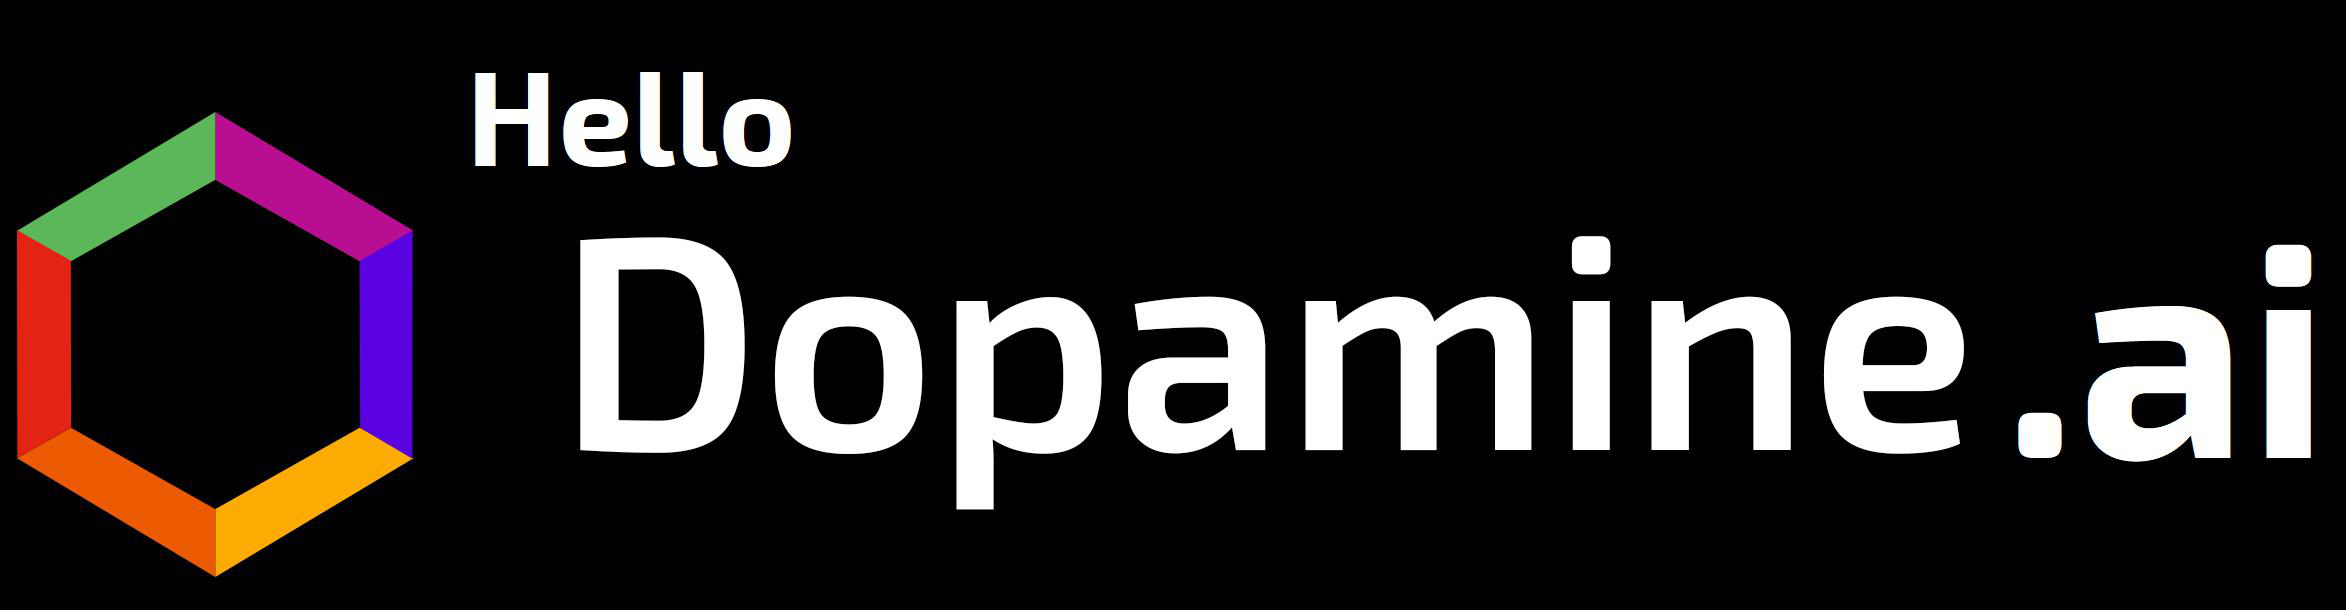

In [9]:
actual_image.image

Finally, I now check the balance after the trade:

In [10]:
print('DOPA Balance:',session.wallet.dopmn_balance)
print('ETH  Balance:',session.wallet.ether_balance)

DOPA Balance: 1000000000008071
ETH  Balance: 78806953800000000000
